In [1]:
import math
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter

In [2]:
df = pd.read_csv('secondary_data.csv', delimiter=';')

In [3]:
na_count=df.isna().sum()*100/df.shape[0]
na_count

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64

In [4]:
#Drop the variables which have more than 80% missing values
x=pd.DataFrame(data=na_count,columns=["Missing Values"]).reset_index()
x.rename(columns={"index":"Column"}, inplace=True)
y=x[x["Missing Values"]>80]
df1=df.drop(y["Column"],axis=1)

In [5]:
##imputing "Unknown" class to all the remaining null values
df2 = df1.fillna("Unknown")
df2.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,Unknown,w,16.95,17.09,y,w,t,g,d,w
1,p,16.60,x,g,o,f,e,Unknown,w,17.99,18.19,y,w,t,g,d,u
2,p,14.07,x,g,o,f,e,Unknown,w,17.80,17.74,y,w,t,g,d,w
3,p,14.17,f,h,e,f,e,Unknown,w,15.77,15.98,y,w,t,p,d,w
4,p,14.64,x,h,o,f,e,Unknown,w,16.53,17.20,y,w,t,p,d,w


In [6]:
df2.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [7]:
#Target Class: To check if dataset is imbalanced
target_class = df2["class"].value_counts()
target_class

p    33888
e    27181
Name: class, dtype: int64

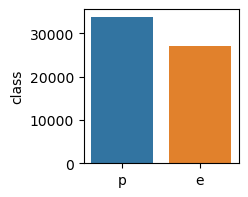

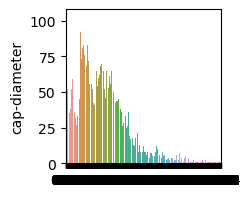

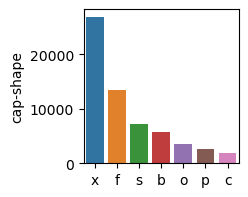

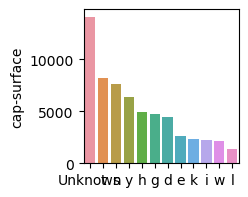

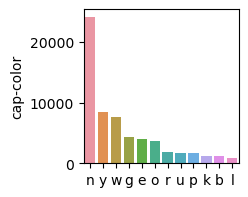

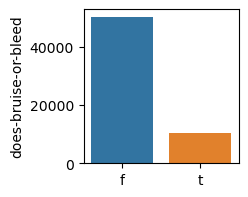

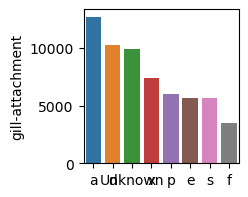

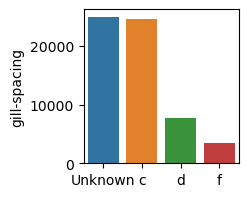

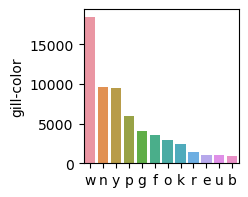

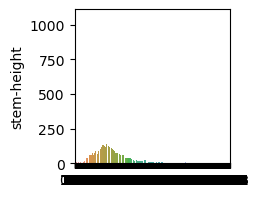

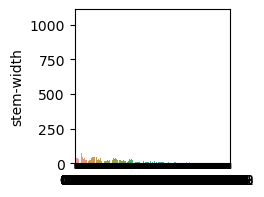

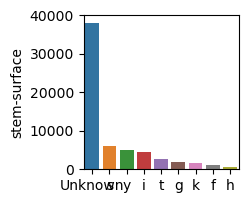

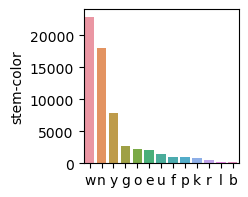

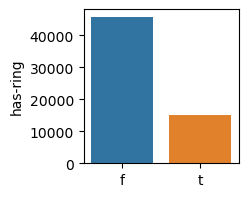

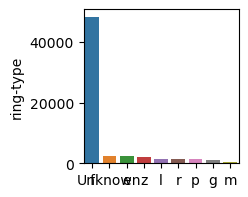

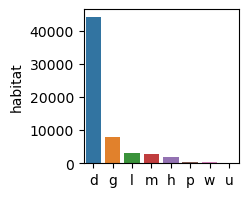

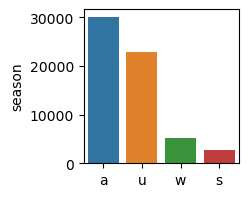

In [8]:
for i, cols in enumerate(df2):
    feature_count = df2[cols].value_counts()
    
    plt.figure(i, figsize=(2,2))
    sns.barplot(x = feature_count.index, y = feature_count)

In [9]:
#One-Hot Encoding
cat_var= ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
            'gill-attachment', 'gill-spacing', 'gill-color',
            'stem-surface', 'stem-color',
            'has-ring', 'ring-type', 'habitat', 'season']

df3 = pd.get_dummies(df2, columns=cat_var)

In [10]:
df3.head()

,class,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,p,15.26,16.95,17.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,p,16.60,17.99,18.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,p,14.07,17.80,17.74,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,p,14.17,15.77,15.98,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,p,14.64,16.53,17.20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# create X and y matrices
X = df3.drop('class', axis=1).values # drop the 'class' column and convert to numpy array
y = np.where(df3['class'] == 'p', 1, 0) # create a binary target variable (1 for poisonous, 0 for edible)

print(X.shape)
print(y.shape)

(61069, 105)
(61069,)


In [12]:
print(X)

[[15.26 16.95 17.09 ...  0.    0.    1.  ]
 [16.6  17.99 18.19 ...  0.    1.    0.  ]
 [14.07 17.8  17.74 ...  0.    0.    1.  ]
 ...
 [ 1.27  3.86  6.37 ...  0.    1.    0.  ]
 [ 1.24  3.56  5.44 ...  0.    1.    0.  ]
 [ 1.17  3.25  5.45 ...  0.    1.    0.  ]]


In [18]:
class LogisticRegression:
    def __init__(self,learningRate, tolerance, maxIteration, l1=0, l2=0):
        self.tolerance = tolerance
        self.learningRate = learningRate
        self.maxIteration = maxIteration
        self.l1 = l1
        self.l2 = l2
        self.w = None
    
    def sigmoid(self, z):
        sig = 1/(1+np.exp(-z))
        return sig

    def costFunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        # approach1
        l1_reg = self.l1 * np.sum(np.abs(self.w))
        l2_reg = self.l2 * np.sum(self.w ** 2)
        cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()+ l1_reg + l2_reg
        cost = -cost/X.shape[0]
        return cost

    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        L1 = self.l1 * np.sign(self.w)
        L2 = self.l2 * (self.w) 
        gradient = (sig-y).dot(X) + L1 + L2
        return gradient
    
    def gradientDescent(self, X, y):
        errors = []
        last_error = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_error = self.costFunction(X, y)
            diff = last_error - current_error
            last_error = current_error
            errors.append(current_error)

            if np.abs(diff) < self.tolerance:
                print('model stopped learning')
                break

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)   
    
    def evaluate(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat == 1)                
        recall = (y & y_hat).sum()/y.sum()
        precision = (y & y_hat).sum()/y_hat.sum()
        f_score = 2*(precision*recall)/(precision+recall)
        return f_score, recall, precision
    
    
    def fit(self, X, y):
        print('Solving using Gradient Descent')
        self.w = np.ones(X_train.shape[1])
        
        self.gradientDescent(X, y)
        
        y_train_hat = self.predict(X_train)
        f_score, recall, precision = self.evaluate(y_train, y_train_hat)
        print('Training F1 score {}'.format(f_score))
        print('Training recall score {}'.format(recall))
        print('Training precision score {}'.format(precision))
    


In [20]:
lr = LogisticRegression(learningRate = 0.0001, tolerance = 0.00005, maxIteration = 1000, l1=0.9, l2=0.01)

In [15]:
lr.fit(X)

Solving using Gradient Descent


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Users\suraj\AppData\Local\Temp\ipykernel_21196\933153728.py:17: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+np.exp(-z))
C:\Users\suraj\AppData\Local\Temp\ipykernel_21196\933153728.py:25: RuntimeWarning: divide by zero encountered in log
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()+ l1_reg + l2_reg
C:\Users\suraj\AppData\Local\Temp\ipykernel_21196\933153728.py:25: RuntimeWarning: invalid value encountered in multiply
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()+ l1_reg + l2_reg
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.47it/s]


Training F1 score 0.7374734766845438
Training recall score 0.9366777013835837
Training precision score 0.6081397591689399
